# KNN với Euclid distance và L2 distance

**Import các thư viện cần thiết**

In [ ]:
#import libraries
import numpy as np
import cv2
import glob
import os
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

**Chuẩn bị data**

In [ ]:
#chuẩn bị data
class processing_data():
  def __init__(self, image):
    self.image = image
  #đồng bộ kích thước ảnh 64x64x3
  def resize_image(self, size = (64, 64)):
    self.image = cv2.resize(src = self.image, dsize = size)
  #chuyển thành ảnh xám và cân bằng độ sáng của ảnh
  def extract_color_histogram(self):
    img_yuv = cv2.cvtColor(self.image, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    #chuyển trở lại về ảnh màu
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    self.image = img_output
  #xử lí ảnh và chuyển ảnh thành vector, trải vector image
  def image_to_feature_vector(self):
    self.resize_image()
    self.extract_color_histogram()
    self.image = np.array(self.image)
    return self.image.flatten()
  
  def convert_image(self):
    self.resize_image()
    self.extract_color_histogram()
    return self.image

**Load data**

In [ ]:
#load ảnh trong folder
def load_img_from_folder(path_folder):
  images = []
  for filename in os.listdir(path_folder):
    img = cv2.imread(os.path.join(path_folder, filename))
    if img is not None:
      model = processing_data(img)
      img = model.image_to_feature_vector()
      images.append(img)
  return images

In [ ]:
#load data
X_train = []
y_train = []
labels = 0

for namefolder in class_names:
  img_dir = train_path + '/' + namefolder
  print(img_dir)
  images = load_img_from_folder(img_dir)
  print(len(images))
  X_train.extend(images)
  y_train.extend([labels] * len(images))
  labels = labels + 1
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape: ", X_train.shape)
print(X_train)
print("y_train shape: ", y_train.shape)
print(y_train)

/content/drive/MyDrive/Colab Notebooks/content/Train/00035
739
/content/drive/MyDrive/Colab Notebooks/content/Train/00011
829
/content/drive/MyDrive/Colab Notebooks/content/Train/00033
409
/content/drive/MyDrive/Colab Notebooks/content/Train/00034
229
/content/drive/MyDrive/Colab Notebooks/content/Train/00007
889
/content/drive/MyDrive/Colab Notebooks/content/Train/00038
1309
/content/drive/MyDrive/Colab Notebooks/content/Train/00032
109
/content/drive/MyDrive/Colab Notebooks/content/Train/00029
109
/content/drive/MyDrive/Colab Notebooks/content/Train/00009
919
/content/drive/MyDrive/Colab Notebooks/content/Train/00036
199
/content/drive/MyDrive/Colab Notebooks/content/Train/00001
1429
/content/drive/MyDrive/Colab Notebooks/content/Train/00005
1189
/content/drive/MyDrive/Colab Notebooks/content/Train/00003
889
/content/drive/MyDrive/Colab Notebooks/content/Train/00006
229


**Load labels**

In [ ]:
#load labels
train_path = '/content/drive/MyDrive/Colab Notebooks/content/Train'
class_names = os.listdir(train_path)
print(class_names)

['00035', '00011', '00033', '00034', '00007', '00038', '00032', '00029', '00009', '00036', '00001', '00005', '00003', '00006']


**Save data**

In [ ]:
#lưu ảnh vào file pickle
class saveData:
    def __init__(self, W):
        self.W = W

model = saveData(X_train)
modelLable = saveData(y_train)

In [ ]:
#lưu
import pickle
f = open("./sample_data/ModelKNN.pickle", "wb")
f1 = open("./sample_data/LabelsKNN.pickle", "wb")
pickle.dump(model, f)
pickle.dump(modelLable, f1)
f.close()

In [ ]:
#load
import pickle
f = open("./sample_data/ModelKNN.pickle", "rb")
f1 = open("./sample_data/LabelsKNN.pickle", "rb")
loaded_model = pickle.load(f)
loaded_modelLabels = pickle.load(f1)
f.close()

**Load test**

In [ ]:
# load test
link_test = '/content/drive/MyDrive/Colab Notebooks/public_save'
X_test = load_img_from_folder(link_test)
print("X_test shape: ", X_test.shape)
print(X_test)

[array([134, 129, 144, ...,  81,  75,  92], dtype=uint8), array([71, 72, 76, ..., 12, 14, 15], dtype=uint8), array([ 72,  87, 110, ...,  73,  89, 102], dtype=uint8), array([42, 48, 58, ..., 50, 54, 68], dtype=uint8), array([147, 151, 152, ...,   0,   0,   1], dtype=uint8), array([37, 39, 47, ..., 37, 39, 46], dtype=uint8), array([168, 164, 163, ...,  78,  73,  74], dtype=uint8), array([248, 247, 244, ...,  19,  37, 114], dtype=uint8), array([170, 171, 181, ..., 112, 102, 104], dtype=uint8), array([254, 253, 255, ...,  86,  94,  91], dtype=uint8), array([191, 191, 184, ..., 152, 146, 170], dtype=uint8), array([218, 244, 255, ..., 100, 105, 104], dtype=uint8), array([157, 153, 152, ...,  12,   7,   8], dtype=uint8), array([103, 108, 112, ...,  13,  14,  12], dtype=uint8), array([76, 73, 75, ..., 42, 49, 43], dtype=uint8), array([ 26,  28,  36, ..., 137, 143, 153], dtype=uint8), array([45, 49, 58, ..., 49, 51, 51], dtype=uint8), array([239, 237, 230, ...,  47,  45,  45], dtype=uint8), arr

**KNN với Euclid Distance (Done)**

In [ ]:
class KNearestNeighbors():
    def __init__(self, k, labels):
        self.k = k
        self.labels = labels
  
    def fit(self, X, y):
        if(X.shape[0] != y.shape[0]):
            raise ValueError('Failed')
        self.X = X
        self.y = y
  
  #lấy khoảng cách Euclid của k điểm gần nhất
  def get_neighbors(self, X_test):
      dists = list()
      k = list()
      for i in range(len(self.X)):
          dist = Eudists(self.X[i], X_test)
          dists.append((y_train[i], dist))
      dists.sort(key = lambda tup : tup[1])
      for i in range(self.k):
          k.append(dists[i][0])
      return np.array(k)

  #dự đoán
  def predict(self, X_test):
      predictions = np.zeros(self.k)
      k = self.get_neighbors(X_test)
      counts = np.bincount(k)
      label = np.argmax(counts)
      return self.labels[label]

#tính khoảng cách Euclid giữa 2 điểm
def Eudists(image1, image2):
    dists = image1 - image2
    dists = dists ** 2
    dist = dists.sum()
    return dist ** 0.5

In [ ]:
model = KNearestNeighbors(k = 1, labels = data_labels)
model.fit(X_train, y_train)

In [ ]:
y_pred = []
for test in X_test:
    y_pred.append(model.predict(test))
print(y_pred)

In [ ]:
res = pd.DataFrame({'Id': image_names, 'Category': y_pred})
res.to_csv('./KNNClassification.csv', index = False)
print(res)

**KNN với L2 distance (Failed)**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print(X_train.shape)
print(y_train.shape)

(8528, 784)
(8528, 14)


In [ ]:
# Định dạng data thành các hàng
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

Công thức L2:

![image](https://i.stack.imgur.com/uRRUG.png)

In [ ]:
class KNearestNeighbor(object):

    def __init__(self):
        pass

    #Training
    def train(self, X, y):
        """
        Inputs:
        - X: X_train (num_train, D)
        - y: Y_train (N,) labels.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        """
        dự đoán

        Inputs:
        - X: X_test (num_test, D)
        - k: số lượng điểm dữ liệu đưa vào dự đoán

        Returns:
        - y: y_pred (num_test,) là labels kết quả
        """
        dists = self.compute_distances_no_loops(X)

        return self.predict_labels(dists, k=k)

    def compute_distances_no_loops(self, X):
        """
        tính khoảng cách theo công thức L2
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt((X ** 2).sum(axis=1, keepdims=1) + (self.X_train ** 2).sum(axis=1) - 2 * X.dot(self.X_train.T))

        return dists

    def predict_labels(self, dists, k=1):
        """
        tính khoảng cách dựa theo công thức trên
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # danh sách khoảng k điểm (có label) gần nhất
            closest_y = []
            #sắp xếp theo trục đã chọn
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            #chuyển dữ liệu cột sang kiểu số nguyên
            closest_y = closest_y.astype(int)
             #chuyển mảng nhiều thành mảng 1 chiều
            closest_y = np.ravel(closest_y)
            #đếm tần số của mảng số nguyên xuất hiện trong closest_y và lấy max
            y_pred[i] = np.bincount(closest_y).argmax() 
        return y_pred

In [ ]:
#do sai shape data nên em chưa fix phần này
import cv2 as cv
folder = ('./drive/MyDrive/Colab Notebooks/public_save')
Labels = ['00001','00003','00005','00006','00007','00009','00011','00029','00032','00033','00034','00035','00036','00038']
classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
y_pred = []
for test in X_test:
    print(test.shape)
    test = np.reshape(test (1, test.shape[0]*test.shape[1]))
    dists2 = classifier2.compute_distances_no_loops(test)
    # Test implementation:
    y_pred.append(classifier2.predict_labels(dists2, k = 1))
print(y_pred)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
folder = ('./drive/MyDrive/Colab Notebooks/public_save')
Labels = ['00001','00003','00005','00006','00007','00009','00011','00029','00032','00033','00034','00035','00036','00038']
classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
img_pred = []
for f in folder:
    img = cv2.imread(f, 0)
    cv2_imshow(img)
    img = cv2.resize(img, (64, 64))
    print(img.shape)
    img = cv2.equalizeHist(img)    # Điều chỉnh độ tương phản của ảnh
    img = np.array(img)
    img = np.reshape(img, (1, img.shape[0]*img.shape[1]))
    dists2 = classifier2.compute_distances_no_loops(img)
    print(dists2.shape)
    # Test implementation:
    y_test_pred = classifier2.predict_label(dists2, k=1)
    print(y_test_pred)
    l = 0
    for i in y_test_pred:
        l = l + 1
        if i == 1:
            img_pred.append(l)
print(img_pred)

**KNN với k = 20** được kết quả 0.83

**KNN với k = 14** được kết quả 0.85

**KNN với k = 1** được kết quả 0.98

# Logicstic Regression

**Em tham khảo nhưng chưa hoàn thiện được vì chưa xử lí đúng được đầu vào**

In [ ]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 71kB 4.2MB/s 


In [ ]:
# Imports
import cv2 
import glob
import os
import jovian
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import torch
import torchvision
import string
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [ ]:
# các hằng số chính
batch_size = 256
learning_rate = 1e-5

# hằng số khác
input_size = 28*28
num_classes = 214

In [ ]:
#load data
X_train = []
y_train = []
y_labels = []
X_val = []
y_val = []
folder_name = ['00001','00003','00005','00006','00007','00009','00011','00029','00032','00033','00034','00035','00036','00038']
for i in range(len(folder_name)):
    img_dir = "./drive/MyDrive/Colab Notebooks/content/Train/" + str(folder_name[i]) 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    tmp_length = 0
    for f in files:
        #đọc ảnh ở thang màu xám
        img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28,28))
        #điều chỉnh tương phản ảnh
        img = cv2.equalizeHist(img)
        X_train.append(img)
        tmp_length+=1
    y_train.extend([i]*tmp_length)
    y_labels.append(folder_name[i])

#chuyển vector thành ma trận nhị phân
y_train = np_utils.to_categorical(y = y_train , num_classes = 14)
y_val = np_utils.to_categorical(y = y_val, num_classes = 14)
#định dạng X_train thành các hàng
X_train = np.array(X_train).reshape(len(X_train), 28, 28, 1)

In [ ]:
#chia mảng thành mảng huấn luyện và đánh giá
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(7675, 784)
(7675, 14)
(853, 784)
(853, 14)


In [ ]:
num_rows = X_train.shape[0]
print(num_rows)

7675


Label:  00001


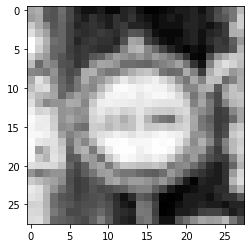

In [ ]:
#thử in ra 1 ảnh
pic1 = np.reshape(X_train[0], (28, 28))
plt.imshow(pic1, cmap = "gray")
print("Label: ", y_labels[0])

In [ ]:
inputs = torch.from_numpy(X_train).float()
targets = torch.from_numpy(y_train).long()
testinputs = torch.from_numpy(X_val).float()
testtargets = torch.from_numpy(y_val).long()

In [ ]:
# Dataloaders
train_loader = DataLoader(X_train, batch_size, shuffle=True)
val_loader = DataLoader(y_train, batch_size*2)
test_loader = DataLoader(X_val, batch_size*2)

Label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


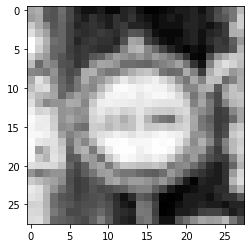

In [ ]:
img, label = X_train[0], y_train[0]
plt.imshow(img.reshape((28,28)), cmap = 'gray')
print("Label: ", label)

In [ ]:
class LRModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Dự đoán
        loss = F.cross_entropy(out, labels) # tính loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch, batch_size
        out = self(images)                    # dự đoán
        loss = F.cross_entropy(out, labels)   # tính loss
        acc = accuracy(out, labels)           # tính độ chính xác
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # các loss
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # độ chính xác
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = LRModel()

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
evaluate(model, val_loader)